In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 1. Veri Seti [cite: 4, 5]
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

print("Oluşturulan DataFrame:")
print(df)
print("\n" + "="*50 + "\n")

Oluşturulan DataFrame:
    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
5      Rain        Cool   Normal  Strong         No
6  Overcast        Cool   Normal  Strong        Yes
7     Sunny        Mild     High    Weak         No
8     Sunny        Cool   Normal    Weak        Yes
9      Rain        Mild   Normal    Weak        Yes




In [16]:
#makine öğrenmesi algoritmaları metin verilerini doğrudan işleyemediği için tüm değişkenleri LabelEncoder kullanarak sayısal değerlere dönüştürmeliyiz.

le = LabelEncoder()  #LabelEncoder'ı başlattık
cols_to_encode= df.columns #Dönüştürülecek sütunları seçtik (tüm sütunlar kategoriktir)
df_encoded= df.copy() # Yeni bir DataFrame (df_encoded) oluşturduk
encoding_mappings= {} #her sütunu dönüştürdük ve dönüşümleri (mapping) sakladık

for col in cols_to_encode:
    df_encoded[col]= le.fit_transform(df[col])
    encoding_mappings[col]= dict(zip(le.classes_, le.transform(le.classes_)))

print("Dönüşüm eşlemeleri (Mapping):")
for col, mapping in encoding_mappings.items():
    print(f"-{col}: {mapping}")

print ("\nSayısallaştırılmış DataFrame (df_encoded):")
print(df_encoded)
print("\n" + "="*50 + "\n")


Dönüşüm eşlemeleri (Mapping):
-Outlook: {'Overcast': np.int64(0), 'Rain': np.int64(1), 'Sunny': np.int64(2)}
-Temperature: {'Cool': np.int64(0), 'Hot': np.int64(1), 'Mild': np.int64(2)}
-Humidity: {'High': np.int64(0), 'Normal': np.int64(1)}
-Wind: {'Strong': np.int64(0), 'Weak': np.int64(1)}
-PlayTennis: {'No': np.int64(0), 'Yes': np.int64(1)}

Sayısallaştırılmış DataFrame (df_encoded):
   Outlook  Temperature  Humidity  Wind  PlayTennis
0        2            1         0     1           0
1        2            1         0     0           0
2        0            1         0     1           1
3        1            2         0     1           1
4        1            0         1     1           1
5        1            0         1     0           0
6        0            0         1     0           1
7        2            2         0     1           0
8        2            0         1     1           1
9        1            2         1     1           1




In [17]:
#bu kısımda verileir ayıracağız ve modelimizi eğiteceğiz
#Öznitelik değişkenlerini (X) ve hedef değişkenini (y) ayıralım ve criterion='entropy' kullanarak modeli eğiteceğiz

X= df_encoded.drop('PlayTennis', axis=1) #Outlook, Temperature, Humidity, WindOutlook, Temperature, Humidity, Wind
y= df_encoded['PlayTennis']  #PlayTennis (Hedef: 0=No, 1=Yes)

model= DecisionTreeClassifier(criterion='entropy', random_state=42)

model.fit(X,y)

print("Karar ağacı modeli (criterion='entropy') eğitimi sonlandı.")
print("\n" + "="*50 + "\n")

Karar ağacı modeli (criterion='entropy') eğitimi sonlandı.




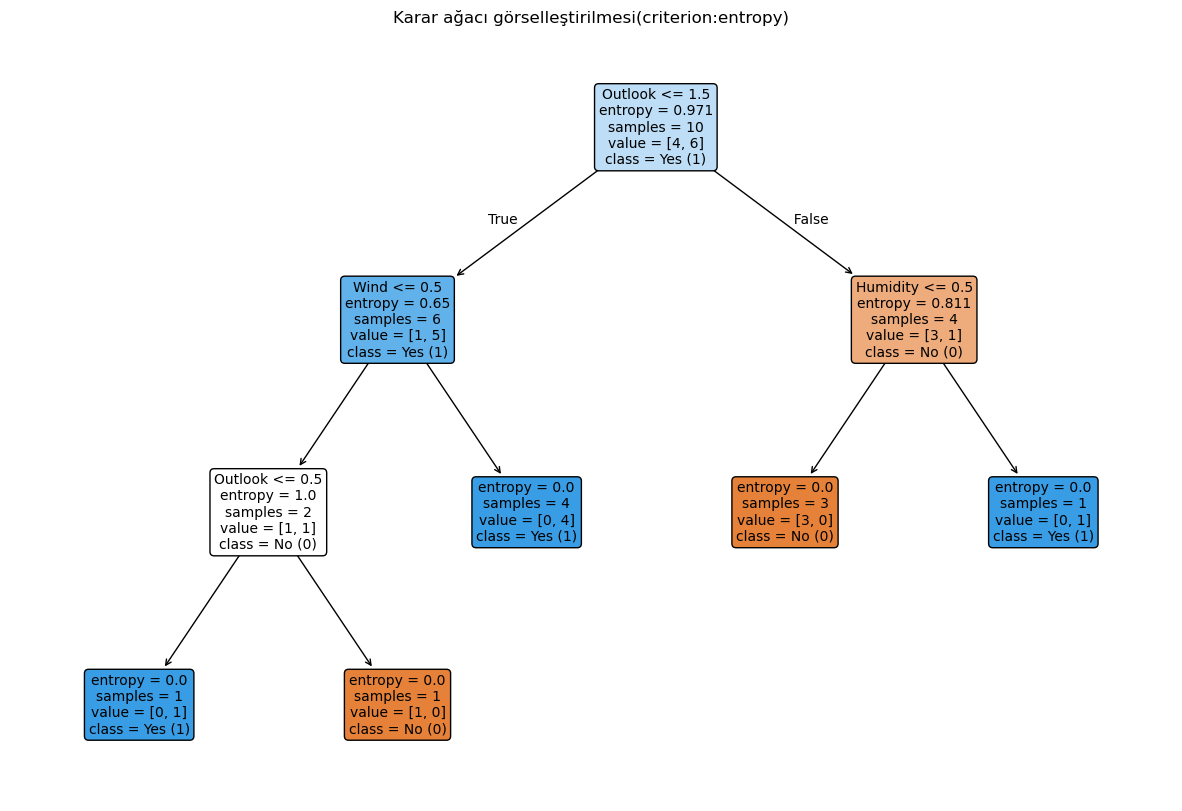


Karar ağacı görselleştirilmiştir.




In [18]:
#ağacın görselleştirildiği kısım

feature_names= X.columns.tolist()
class_names = [f"No ({encoding_mappings['PlayTennis']['No']})", f"Yes ({encoding_mappings['PlayTennis']['Yes']})"]

plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Karar ağacı görselleştirilmesi(criterion:entropy)")
plt.show()
print("\nKarar ağacı görselleştirilmiştir.")
print("\n" + "="*50 + "\n")

In [19]:
#tahminin yapıldığı kısım
new_data_raw= pd.DataFrame({
    'Outlook': ['Sunny'], 
    'Temperature': ['Cool'], 
    'Humidity': ['High'], 
    'Wind': ['Weak']
})

new_data_encoded = new_data_raw.copy()
new_data_encoded['Outlook'] = encoding_mappings['Outlook']['Sunny']
new_data_encoded['Temperature'] = encoding_mappings['Temperature']['Cool']
new_data_encoded['Humidity'] = encoding_mappings['Humidity']['High']
new_data_encoded['Wind'] = encoding_mappings['Wind']['Weak']

prediction_encoded = model.predict(new_data_encoded)  #tahminin yapıldığı yer

predicted_label = 'Yes' if prediction_encoded[0] == 1 else 'No'

print(f"Yeni Veri (Sunny, Cool, High, Weak) için Sayısal Giriş:\n{new_data_encoded.iloc[0].to_dict()}")
print(f"Modelin Tahmini: {predicted_label} ")
print("\n" + "="*50 + "\n")

Yeni Veri (Sunny, Cool, High, Weak) için Sayısal Giriş:
{'Outlook': 2, 'Temperature': 0, 'Humidity': 0, 'Wind': 1}
Modelin Tahmini: No 




## [cite_start]3. Entropi ve Bilgi Kazancı Hesaplamaları (Manuel) [cite: 17]

#### 3.1. Genel Entropi Hesaplaması (Total Entropy)

Toplam gözlem sayısı 10'dur. `PlayTennis = Yes`: 6 adet; `PlayTennis = No`: 4 adet.

**Gerekli Formül:**
$$E(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)$$

**Hesaplama:**
$$E(S) = -\left(\frac{6}{10} \log_2 \frac{6}{10} + \frac{4}{10} \log_2 \frac{4}{10}\right)$$
$$E(S) \approx - (0.6 \times (-0.737) + 0.4 \times (-1.322))$$
$$E(S) \approx \mathbf{0.971 \text{ bit}}$$

---

#### 3.2. [cite_start]Bilgi Kazancı Hesaplamaları (Information Gain - $IG$) [cite: 17]

**Genel Formül:**
$$IG(S, A) = E(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} E(S_v)$$

##### a) Outlook İçin Bilgi Kazancı

| Outlook Değeri | Gözlem Sayısı ($|S_v|$) | Yes | No | Entropi ($E(S_v)$) |
| :---: | :---: | :---: | :---: | :---: |
| Sunny | 4 | 1 | 3 | $\approx 0.811$ |
| Overcast | 2 | 2 | 0 | $0$ |
| Rain | 4 | 3 | 1 | $\approx 0.811$ |

**Kalan Entropi:**
$$\text{Kalan Entropi}(\text{Outlook}) \approx \frac{4}{10}(0.811) + \frac{2}{10}(0) + \frac{4}{10}(0.811) \approx 0.648 \text{ bit}$$

**Bilgi Kazancı:**
$$IG(\text{Outlook}) = 0.971 - 0.648 \approx \mathbf{0.323 \text{ bit}}$$

##### b) Humidity İçin Bilgi Kazancı

| Humidity Değeri | Gözlem Sayısı ($|S_v|$) | Yes | No | Entropi ($E(S_v)$) |
| :---: | :---: | :---: | :---: | :---: |
| High | 5 | 2 | 3 | $\approx 0.971$ |
| Normal | 5 | 4 | 1 | $\approx 0.722$ |

**Bilgi Kazancı:**
$$IG(\text{Humidity}) = 0.971 - 0.847 \approx \mathbf{0.124 \text{ bit}}$$

##### c) Diğer Öznitelikler İçin Sonuçlar
* $IG(\text{Wind}) \approx \mathbf{0.048 \text{ bit}}$
* $IG(\text{Temperature}) \approx \mathbf{0.029 \text{ bit}}$

---

### [cite_start]4. Modelin İlk Bölünme Kararının Yorumu [cite: 18]

**Yorum:**

Karar ağacının kök düğümünde (**ilk bölünme kararı**), en yüksek Bilgi Kazancı ($IG$) değerine sahip olan **Outlook** özniteliği seçilmiştir. Outlook'un $IG=0.323$ değeri, tüm diğer özniteliklerden daha yüksektir. Bu, Outlook'un veri setindeki saflığı (Entropiyi) en çok azaltan ve dolayısıyla en iyi sınıflandırma bilgisini sağlayan öznitelik olduğu anlamına gelir. Özellikle, `Outlook = Overcast` dalı sıfır Entropiye (saf bir düğüme) sahiptir ve bu dalda PlayTennis sonucu kesinlikle 'Yes'tir.